<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_9_9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9- analogous to task 4

In [ ]:
%%capture
!pip install nilearn

In [ ]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
%%capture
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 1) # we fix this at 1
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

In [ ]:
# We import the X matrix and y vector, and we scale X
X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)

In [ ]:
# We manually split the data into train and test partitions
train_indices = list(range(0,90))
test_indices = list(range(90,100))
# We combine the partitions into one variable which we will pass to the cv argument below
split = [(train_indices, test_indices)] 

In [ ]:
%%capture
# We prepare the MLPRegressor model
mlp = MLPRegressor(max_iter=1000, alpha=0.0001)
# We define the parameter space for GridSearch to work on
parameters = {'random_state':(np.linspace(0,100,100).astype('int')), 'hidden_layer_sizes':[[10,], [10,10], [10,10,10], [10,10,10,10], [10,10,10,10,10]]}
# We define the GridSearch estimator
clf = GridSearchCV(mlp,parameters,cv=split,return_train_score=True) # return_train_score has to be True in order for us to retrieve training scores
# We fit the estimator to our data
clf.fit(X_scaled, y)

In [ ]:
# We create a pandas dataframe of the results
NN = pd.DataFrame(clf.cv_results_)

In [ ]:
# We extract the two columns of interest
test_scores = np.array(NN["split0_test_score"])
train_scores = np.array(NN["split0_train_score"])

In [ ]:
# We split the test scores according to the model layers
a = test_scores[0:100]
b = test_scores[100:200]
c = test_scores[200:300]
d = test_scores[300:400]
e = test_scores[400:500]

In [ ]:
# We split the training scores according to the model layers
f = train_scores[0:100]
g = train_scores[100:200]
h = train_scores[200:300]
i = train_scores[300:400]
j = train_scores[400:500]

In [ ]:
# We regroup the 5 partitions
test_test_scores = [a,b,c,d,e]
train_train_scores = [f,g,h,i,j]

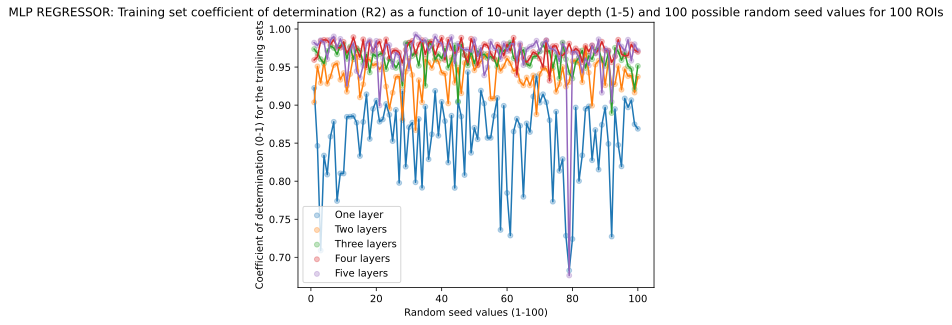

In [ ]:
# We're ready to plot the training scores!
depth = list(range(1,101))
lab = ("One layer", "Two layers", "Three layers", "Four layers", "Five layers")
plt.style.use("default")
plt.scatter(depth,train_train_scores[0], s=25, alpha = 0.3, marker = 'o')
plt.scatter(depth,train_train_scores[1], s=25, alpha = 0.3, marker = 'o')
plt.scatter(depth,train_train_scores[2], s=25, alpha = 0.3, marker = 'o')
plt.scatter(depth,train_train_scores[3], s=25, alpha = 0.3, marker = 'o')
plt.scatter(depth,train_train_scores[4], s=25, alpha = 0.3, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="MLP REGRESSOR: Training set coefficient of determination (R2) as a function of 10-unit layer depth (1-5) and 100 possible random seed values for 100 ROIs",
    xlabel="Random seed values (1-100)",
    ylabel="Coefficient of determination (0-1) for the training sets",
)
plt.plot(depth,train_train_scores[0])
plt.plot(depth,train_train_scores[1])
plt.plot(depth,train_train_scores[2])
plt.plot(depth,train_train_scores[3])
plt.plot(depth,train_train_scores[4])
plt.show()

It looks like our training R2 improves every time we increase the number of layers by one, reaching a ceiling performance of virtually R2=1 with the four-layer and five-layer models. Interestingly, when the random seed is almost 80, we see a drop in performance for the one-layer and five-layer models.

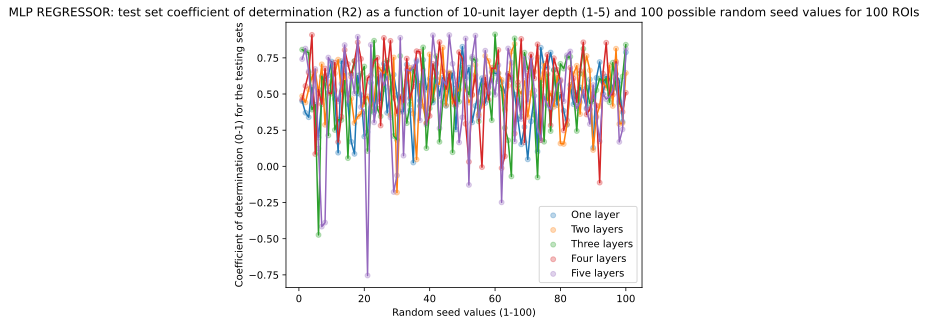

In [ ]:
# We're ready to plot the testing scores!
depth = list(range(1,101))
lab = ("One layer", "Two layers", "Three layers", "Four layers", "Five layers")
plt.style.use("default")
plt.scatter(depth,test_test_scores[0], s=25, alpha = 0.3, marker = 'o')
plt.scatter(depth,test_test_scores[1], s=25, alpha = 0.3, marker = 'o')
plt.scatter(depth,test_test_scores[2], s=25, alpha = 0.3, marker = 'o')
plt.scatter(depth,test_test_scores[3], s=25, alpha = 0.3, marker = 'o')
plt.scatter(depth,test_test_scores[4], s=25, alpha = 0.3, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="MLP REGRESSOR: test set coefficient of determination (R2) as a function of 10-unit layer depth (1-5) and 100 possible random seed values for 100 ROIs",
    xlabel="Random seed values (1-100)",
    ylabel="Coefficient of determination (0-1) for the testing sets",
)
plt.plot(depth,test_test_scores[0])
plt.plot(depth,test_test_scores[1])
plt.plot(depth,test_test_scores[2])
plt.plot(depth,test_test_scores[3])
plt.plot(depth,test_test_scores[4])
plt.show()

This plot is a bit more jumbled, but we can already see that the more complex models have comparatively higher performance peaks across the distribution of random seed values.